In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from data.prepare_data import *
from data.prepare_word2vec_ed import *

# Counts of answers for knowledge components

In [ ]:
# The counts contain all answers (no duplicated answers from user on one question) for knowledge components

import pandas as pd
import matplotlib.pyplot as plt
import os
from data.prepare_data import merge_logs_with_questions, merge_data_with_practice_sets


def get_counts_of_answers_for_kc(crucial_data, system_ps, export=False):
    """get practice sets with theirs counts of answers"""
    count_kcs = crucial_data['parent_kc'].value_counts()
    if export:
        practice_sets_answers_count.to_csv('processed/counts_of_answers_for_kcs.csv')
    return count_kcs


def plot_kcs_with_most_answers(data_ps, system_ps):
    df = get_counts_of_answers_for_kc(data_ps, system_ps).head(30)
    df.plot(kind='bar')
    plt.gcf().set_size_inches(15, 10)
    plt.title('Counts of answers for knowledge components (top30)', color='black')
    plt.xlabel('kc_id')
    # plt.savefig('visualizations/matplotlib/counts_of_answers_for_knowledge_components.png')
    plt.show()


if __name__ == '__main__':
    os.chdir('/home/daniel/school/BP/pythesis')
    logs = pd.read_csv('data/nova_doplnovacka_log.csv', sep=';')
    questions = pd.read_csv('data/nova_doplnovacka_questions.csv', sep=';')
    system_ps_problem = pd.read_csv('data/system_ps_problem.csv', sep=';')
    system_ps = pd.read_csv('data/system_ps.csv', sep=';')

    basic_data = merge_logs_with_questions(logs, questions).drop_duplicates(['user', 'question_id'], keep='first')
    ps_data = merge_data_with_practice_sets(basic_data, system_ps_problem, system_ps).drop_duplicates(['id', 'parent_kc'], keep='first')
    plot_kcs_with_most_answers(ps_data, system_ps)

In [44]:
os.chdir('/home/daniel/school/BP/pythesis')
logs = pd.read_csv('data/nova_doplnovacka_log.csv', sep=';')
questions = pd.read_csv('data/nova_doplnovacka_questions.csv', sep=';')
system_ps_problem = pd.read_csv('data/system_ps_problem.csv', sep=';')
system_ps = pd.read_csv('data/system_ps.csv', sep=';')
system_kc = pd.read_csv('data/system_kc.csv', sep=';')
# dropping duplicates of answers for each user
basic_data = merge_logs_with_questions(logs, questions).drop_duplicates(['user', 'question_id'], keep='first')
# left join from no duplicates data with practice sets and its parent_kc -> dropping rows where the parent_kc is multiple times the same for one answer
ps_data = merge_data_with_practice_sets(basic_data, system_ps_problem, system_ps).drop_duplicates(['id', 'parent_kc'], keep='first')

In [45]:
os.chdir('/home/daniel/school/BP/pythesis')
logs = pd.read_csv('data/nova_doplnovacka_log.csv', sep=';')
questions = pd.read_csv('data/nova_doplnovacka_questions.csv', sep=';')
system_ps_problem = pd.read_csv('data/system_ps_problem.csv', sep=';')
system_ps = pd.read_csv('data/system_ps.csv', sep=';')
system_kc = pd.read_csv('data/system_kc.csv', sep=';')
# dropping duplicates of answers for each user
basic_data = merge_logs_with_questions(logs, questions)#.drop_duplicates(['user', 'question_id'], keep='first')
# left join from no duplicates data with practice sets and its parent_kc -> dropping rows where the parent_kc is multiple times the same for one answer
ps_data2 = merge_data_with_practice_sets(basic_data, system_ps_problem, system_ps).drop_duplicates(['user', 'question_id', 'parent_kc'], keep='first')

In [30]:
count_kcs = ps_data['parent_kc'].value_counts().head(30)
count_kcs = count_kcs.drop(1)

In [31]:
practice_sets_table = system_kc[['id','name']].set_index('id')
practice_sets_answers_count = count_kcs.to_frame().join(practice_sets_table)
practice_sets_answers_count.columns = ['count', 'name']
practice_sets_answers_count.index.names = ['kc_id']

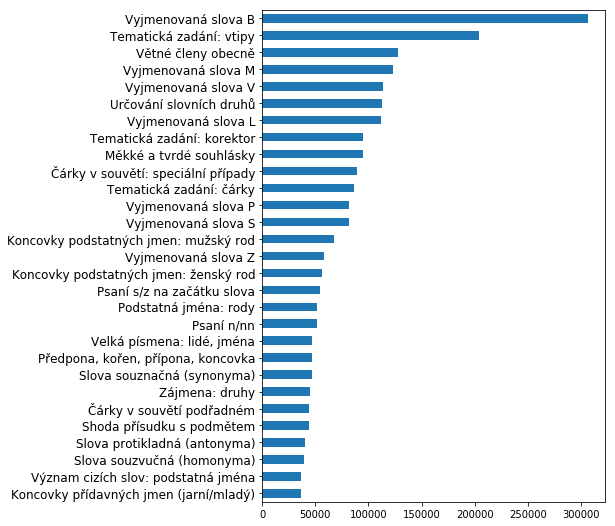

In [32]:
df = practice_sets_answers_count
labels= df['name'].tolist()
df.plot(kind='barh', legend=False)
plt.gca().invert_yaxis()
plt.gca().set_yticklabels(labels, fontsize=12)
plt.tight_layout()
plt.gcf().set_size_inches(15, 8)
plt.ylabel('')
# plt.title('Counts of answers for knowledge components (top30)', color='black')
# plt.savefig('visualizations/matplotlib/counts_of_answers_for_knowledge_components.svg')
plt.show()

# Counts of answers for practice sets

In [ ]:
# The counts contain all answers (no duplicated answers from user on one question) for practice sets

import pandas as pd
import matplotlib.pyplot as plt
import os
from data.prepare_data import merge_logs_with_questions, merge_data_with_practice_sets


def get_counts_of_answers_for_ps(crucial_data, system_ps, export=False):
    """get practice sets with theirs counts of answers"""
    count_practice_sets = crucial_data['ps'].value_counts()
    practice_sets_table = system_ps[['id','url']].set_index('id')
    practice_sets_answers_count = count_practice_sets.to_frame().join(practice_sets_table)
    practice_sets_answers_count.columns = ['count', 'url']
    practice_sets_answers_count.index.names = ['ps_id']

    if export:
        practice_sets_answers_count.to_csv('processed/counts_of_answers_for_practice_sets.csv')

    return practice_sets_answers_count


def plot_practice_sets_with_most_answers(data_ps, system_ps):
    df = get_counts_of_answers_for_ps(data_ps, system_ps).head(15)
    df.plot(kind='bar')
    plt.gcf().set_size_inches(12, 8)
    plt.title('Counts of answers for practice sets (top15)', color='black')
    plt.xlabel('practice_set_id')
    # plt.savefig('visualizations/matplotlib/counts_of_answers_for_practice_sets.png')
    plt.show()


if __name__ == '__main__':
    os.chdir('/home/daniel/school/BP/pythesis')
    logs = pd.read_csv('data/nova_doplnovacka_log.csv', sep=';')
    questions = pd.read_csv('data/nova_doplnovacka_questions.csv', sep=';')
    system_ps_problem = pd.read_csv('data/system_ps_problem.csv', sep=';')
    system_ps = pd.read_csv('data/system_ps.csv', sep=';')

    basic_data = merge_logs_with_questions(logs, questions).drop_duplicates(['user', 'question_id'], keep='first')
    ps_data = merge_data_with_practice_sets(basic_data, system_ps_problem, system_ps)
    plot_practice_sets_with_most_answers(ps_data, system_ps)


# Missing questions in word2vec model

In [39]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from gensim.models import Word2Vec

from data.prepare_data import *
from data.prepare_word2vec_ed import *
from similarities.text_similarities import levenshtein_similarity, minimum_edit_distance, levenshtein_similarity_with_threshold

def get_ps_data():
    logs = pd.read_csv('data/nova_doplnovacka_log.csv', sep=';')
    questions = pd.read_csv('data/nova_doplnovacka_questions.csv', sep=';')
    system_ps_problem = pd.read_csv('data/system_ps_problem.csv', sep=';')
    system_ps = pd.read_csv('data/system_ps.csv', sep=';')
    system_kc = pd.read_csv('data/system_kc.csv', sep=';')
    basic_data = merge_logs_with_questions(logs, questions)#.drop_duplicates(['user','question_id'])
    ps_data = merge_data_with_practice_sets(basic_data, system_ps_problem, system_ps)
    return ps_data

In [40]:
ps_data = get_ps_data() #.drop_duplicates(['user','question_id'])
model = Word2Vec.load('utils/word2vec.model')

In [41]:
len(ps_data)

8507332

In [43]:
ps_data[:100]

,id,user,correct,question_id,correct_answer,question,url,ps,parent_kc,exercise
0,1,405872,1,2268,í,sb_rka známek,doplnovacka-vyjmenovana-slova-po-b-1-uroven,1,1,1
0,1,405872,1,2268,í,sb_rka známek,otazky-vyjmenovana-slova-po-b-1-uroven,85,1,2
0,1,405872,1,2268,í,sb_rka známek,doplnovacka-vyjmenovana-slova-po-b-1-uroven,383,26,26
1,2,405872,0,5356,y,když jsem b_l malý,doplnovacka-vyjmenovana-slova-po-b-1-uroven,1,1,1
1,2,405872,0,5356,y,když jsem b_l malý,otazky-vyjmenovana-slova-po-b-1-uroven,85,1,2
1,2,405872,0,5356,y,když jsem b_l malý,doplnovacka-vyjmenovana-slova-po-b-1-uroven,383,26,26
2,3,405872,0,2253,ý,chtěl bych u vás chvíli pob_t,doplnovacka-vyjmenovana-slova-po-b-1-uroven,1,1,1
2,3,405872,0,2253,ý,chtěl bych u vás chvíli pob_t,otazky-vyjmenovana-slova-po-b-1-uroven,85,1,2
2,3,405872,0,2253,ý,chtěl bych u vás chvíli pob_t,doplnovacka-vyjmenovana-slova-po-b-1-uroven,383,26,26
3,4,405872,1,2277,i,kab_na lanovky,doplnovacka-vyjmenovana-slova-po-b-1-uroven,1,1,1


In [26]:
len(ps_data)

1591723

In [3]:
ps_data.head()

,id,user,correct,question_id,correct_answer,question,url,ps,parent_kc,exercise
0,1,405872,1,2268,í,sb_rka známek,doplnovacka-vyjmenovana-slova-po-b-1-uroven,1,1,1
1,2,405872,0,5356,y,když jsem b_l malý,doplnovacka-vyjmenovana-slova-po-b-1-uroven,1,1,1
2,3,405872,0,2253,ý,chtěl bych u vás chvíli pob_t,doplnovacka-vyjmenovana-slova-po-b-1-uroven,1,1,1
3,4,405872,1,2277,i,kab_na lanovky,doplnovacka-vyjmenovana-slova-po-b-1-uroven,1,1,1
4,5,405872,1,26,y,ab_ch,doplnovacka-vyjmenovana-slova-po-b-1-uroven,1,1,1


In [13]:
final_data = ps_data[ps_data['question'].apply(lambda x: x.count('_')) == 1].copy()

In [14]:
len(final_data.question_id.unique())

5647

In [21]:
def get_word2vec_items(model, data, verbose=False):
    """Returns list of word vectors for data which is only in the vocabulary of your model
    and the dataframe based on the model. 2 columns are added - 'solution' and 'full solution'.

    Parameter 'model' is instantiated Word2vecmodel you loaded before.
    Parameter 'data' has to have 'correct_answer', 'question' columns.
    """

    data = data.drop_duplicates(subset=['question_id'], keep='first').copy()
    data['solution'] = get_solutions(data, method='fillin')
    data['full_solution'] = get_solutions(data, method='full')
    X, ids = [], []

    for id, solution, question, url, ps in zip(data['id'], data['solution'], data['question'], data['url'], data['ps']):
        try:
            # in slova_po_b is the word 'bicí' a big outlier in visualization, i'd rather get rid of it
            if solution == 'bicí':
                continue
            X.append(model.wv[solution])
            ids.append(id)
        except KeyError:
            if verbose:
                
                print("Word '{}' in question '{}'| URL: {}| PS: {} | is not in vocabulary of your model, therefore it's not in the resulting data.".format(
                solution, question, url, ps))
    return X, data[data['id'].isin(ids)].copy()

In [7]:
X, data = get_word2vec_items(model, final_data, verbose=True)
# some questions with same text are labeled in more question_ids
data.sort_values(['question_id'], inplace=True)
data.drop_duplicates(['question'], inplace=True)

Word 'zabydlený' in question 'zab_dlený' is not in vocabulary of your model, therefore it's not in the resulting data.
Word 'bystrozraký' in question 'b_strozraký' is not in vocabulary of your model, therefore it's not in the resulting data.
Word 'blýskavé' in question 'bl_skavé náušnice' is not in vocabulary of your model, therefore it's not in the resulting data.
Word 'přežvykoval' in question 'kůň přežv_koval starý chléb' is not in vocabulary of your model, therefore it's not in the resulting data.
Word 'povykovat' in question 'pov_kovat' is not in vocabulary of your model, therefore it's not in the resulting data.
Word 'odvykat' in question 'odv_kat' is not in vocabulary of your model, therefore it's not in the resulting data.
Word 'říkadly' in question 'kniha s říkadl_' is not in vocabulary of your model, therefore it's not in the resulting data.
Word 'lasy' in question 'kovbojové s las_' is not in vocabulary of your model, therefore it's not in the resulting data.
Word 'žezly' in

In [8]:
print('%d out of %d words are not in our word2vec model' % (len(final_data.question_id.unique()) - len(data.question_id.unique()), len(final_data.question_id.unique())))

874 out of 5647 words are not in our word2vec model


In [9]:
len(final_data.question_id.unique())

5647

In [10]:
len(final_data.question.unique())

5562

In [11]:
# to get only the not duplicated data from our word2vec model
filtered = final_data.loc[final_data['question_id'].isin(data['question_id'])]
correctness_matrix = reshape_to_correctness_matrix(filtered)

In [12]:
len(filtered.question_id.unique())

4773

In [46]:
# pearson = correctness_matrix_to_similarity_matrix('pearson', correctness_matrix)
pearson = pd.read_csv('data/processed/all_fillin_exercises/simmatrix-pearson-all_fillin_exercises_data.csv', index_col=0)

In [50]:
# pearson2 = pearson.corr()
pearson2 = pd.read_csv('data/processed/all_fillin_exercises/simmatrix-doublepearson-all_fillin_exercises_data.csv', index_col=0)

In [ ]:
# editdistance = create_edit_similarity_matrix(data['question_id'], data['solution'], levenshtein_similarity)

In [31]:
# word2vec = create_word2vec_similarity_matrix(model, data['question_id'], data['solution'])

In [54]:
similarities = pd.DataFrame()
# similarities['ed'] = editdistance.values.flatten().astype(float)
similarities['pearson'] = pearson.values.flatten().astype(float)
similarities['doublepearson'] = pearson2.values.flatten().astype(float)
# similarities['word2vec'] = word2vec.values.flatten().astype(float)

In [55]:
similarities.corr()

,pearson,doublepearson
pearson,1.000000,0.721981
doublepearson,0.721981,1.000000


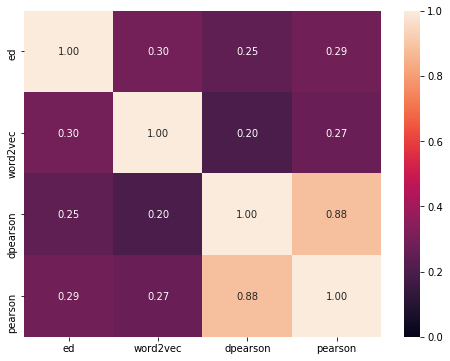

In [51]:
# editdistance, word2vec, doublepearson, pearson = get_simmatrices(data)
corr_matrix = get_correlation_matrix(editdistance, word2vec, doublepearson, pearson)
sns.heatmap(corr_matrix, annot=True, fmt=".2f", vmin=0)
plt.gcf().set_size_inches(8, 6)
plt.savefig('visualizations/seaborn/heatmap-correlations-measures-%s.png' % dataset['name'])
plt.show()